In [3]:
"""
emotion_data: shape (33, 9, 8, 15000) = (num_subject, trials, electrode channels, time samples)
    trials (9 trials): resting, happy/peaceful, sad/angry 
    electrode channels (8 channels): Fp(AF7, FPZ, AF8), Central (C3, CZ, C4), Ear (Left, Right) 
    time samples: 125 Hz downsampled, 1-40 Hz bandpass filtered, 60 Hz notch filtered

NOTE: signal for resting state is concatenated signal (60 sec eyes open + 60 sec eyes closed)

emotion_label: shape (33, 9, 2) = (num_subject, trials, emotional state)
    emotional state: idx 0 is for arousal, and idx 1 is for valence. scored 1 to 5.

NOTE: you can transform score label into binary label (pos/neg valence and high/low arousal), as follows:
        new_emotion_label = np.array(emotion_label>2,int)
""" 

'\nemotion_data: shape (33, 9, 8, 15000) = (num_subject, trials, electrode channels, time samples)\n    trials (9 trials): resting, happy/peaceful, sad/angry \n    electrode channels (8 channels): Fp(AF7, FPZ, AF8), Central (C3, CZ, C4), Ear (Left, Right) \n    time samples: 125 Hz downsampled, 1-40 Hz bandpass filtered, 60 Hz notch filtered\n\nNOTE: signal for resting state is concatenated signal (60 sec eyes open + 60 sec eyes closed)\n\nemotion_label: shape (33, 9, 2) = (num_subject, trials, emotional state)\n    emotional state: idx 0 is for arousal, and idx 1 is for valence. scored 1 to 5.\n\nNOTE: you can transform score label into binary label (pos/neg valence and high/low arousal), as follows:\n        new_emotion_label = np.array(emotion_label>2,int)\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

emotion_data = np.load('emotion_data.npy')
emotion_label = np.load('emotion_label.npy')

In [2]:
new_emotion_label = np.array(emotion_label>2,int)
print(np.sum(new_emotion_label[:,:,0]==0),np.sum(new_emotion_label[:,:,0]!=0))
print(np.sum(new_emotion_label[:,:,1]==0),np.sum(new_emotion_label[:,:,1]!=0))

147 141
108 180


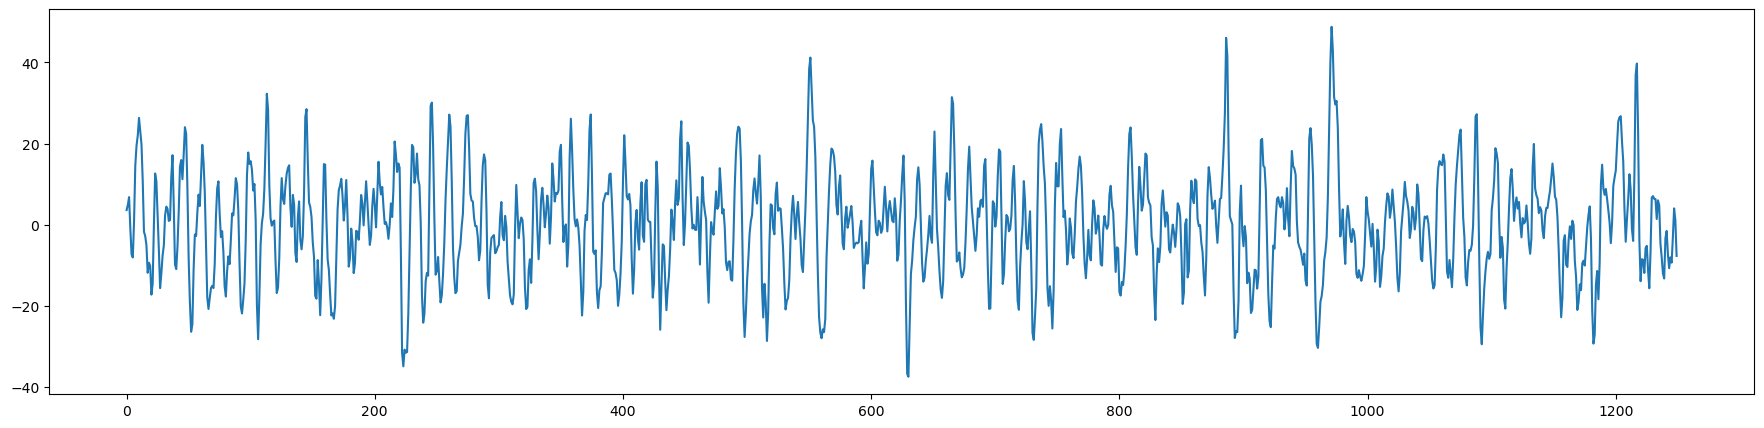

In [11]:
plt.figure(figsize=(22,5))
plt.plot(emotion_data[0,0,0,125*110:]/1000)

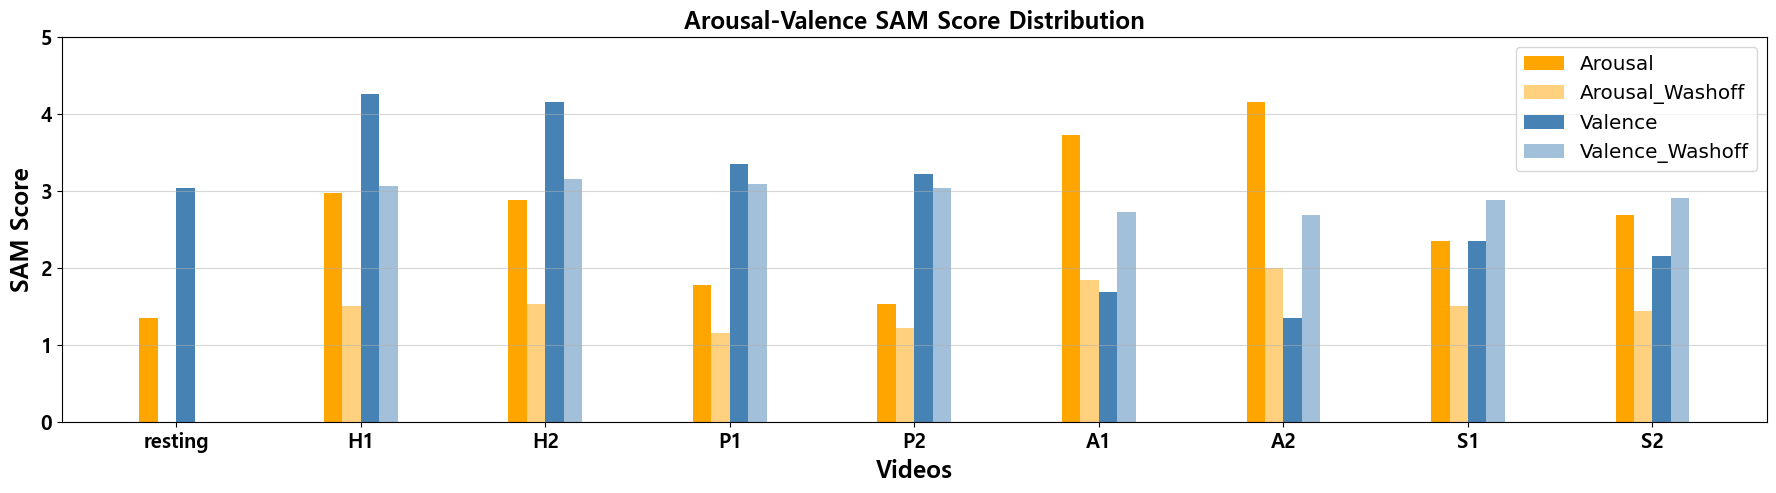

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

def Plot_Emotion_Label_Distribution():
    ROOT_PATH = r'D:/One_한양대학교/private object minsu/coding/data/samsung_2024/Day 1/'
    subj_list = os.listdir(ROOT_PATH)
    videos = ['resting','H1','H2','P1','P2','A1','A2','S1','S2']
    num_videos = len(videos)

    emotion_label_ = np.zeros((len(subj_list), num_videos, 4), int)
    for idx, subj in enumerate(subj_list):
        dat_list = os.listdir(ROOT_PATH + subj)

        label_raw = pd.read_csv(ROOT_PATH + subj + '/' + [s for s in dat_list if 'Emotion' in s][0])
        emotion_label_[idx,:,:2] = np.array(label_raw[videos][:2]).T
        emotion_label_[idx,1:,2:] = np.array(label_raw[['H1w','H2w','P1w','P2w','A1w','A2w','S1w','S2w']][:2]).T

    plt.figure(figsize=(22,5))
    bar_width = 0.1
    index = np.arange(0,num_videos,1)

    mean_emotion_label = np.mean(emotion_label_,0)
    std_emotion_label = np.std(emotion_label_,0)

    plt.grid(axis='y',alpha=.5)
    bar1 = plt.bar(index - bar_width, mean_emotion_label[:,0], bar_width, alpha=1, color = 'orange', label = 'Arousal')# , yerr=std_emotion_label[:,0])
    bar3 = plt.bar(index, mean_emotion_label[:,2], bar_width, alpha=.5, color = 'orange', label = 'Arousal_Washoff')# , yerr=std_emotion_label[:,2])
    bar2 = plt.bar(index + bar_width, mean_emotion_label[:,1], bar_width, alpha=1, color = 'steelblue', label = 'Valence')# , yerr=std_emotion_label[:,1])
    bar4 = plt.bar(index + bar_width*2, mean_emotion_label[:,3], bar_width, alpha=.5, color = 'steelblue', label = 'Valence_Washoff')# , yerr=std_emotion_label[:,3])
    plt.xticks(np.arange(bar_width/2, num_videos+bar_width/2, 1), videos, fontweight='bold', fontsize='x-large', fontfamily='Malgun Gothic')
    plt.yticks(np.arange(0,6,1), fontweight='semibold',fontsize='x-large', fontfamily='Malgun Gothic')
    plt.title('Arousal-Valence SAM Score Distribution', fontsize='xx-large', fontweight='bold', fontfamily='Malgun Gothic')
    plt.ylabel("SAM Score", fontsize='xx-large', fontweight='bold', fontfamily='Malgun Gothic')
    plt.xlabel("Videos", fontsize='xx-large', fontweight='bold', fontfamily='Malgun Gothic')
    plt.legend(['Arousal','Arousal_Washoff','Valence','Valence_Washoff'], fontsize='x-large')

Plot_Emotion_Label_Distribution()